Train samples: 160
Val samples: 20
Test samples: 20
✅ Dados normalizados
✅ Modelo SVM treinado

Validação - Acurácia: 0.8000
Validação - F1 Score: 0.7833

Teste - Acurácia: 0.9500
Teste - F1 Score: 0.9467


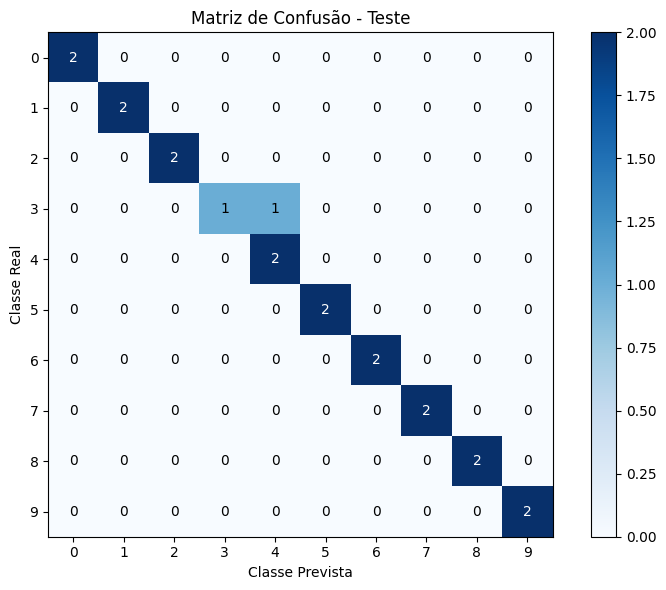


Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.97      0.95      0.95        20
weighted avg       0.97      0.95      0.95        20



In [3]:
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ===========================
# 1. Carrega os datasets
# ===========================
train_df = pd.read_csv("splits/train.csv")
val_df = pd.read_csv("splits/val.csv")
test_df = pd.read_csv("splits/test.csv")

print(f"Train samples: {len(train_df)}")
print(f"Val samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

# ===========================
# 2. Separa X e y
# ===========================
X_train = train_df.drop(columns=["filename", "class_id"])
y_train = train_df["class_id"]

X_val = val_df.drop(columns=["filename", "class_id"])
y_val = val_df["class_id"]

X_test = test_df.drop(columns=["filename", "class_id"])
y_test = test_df["class_id"]

# ===========================
# 3. Normalização
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Dados normalizados")

# ===========================
# 4. Treinamento do SVM
# ===========================
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

print("✅ Modelo SVM treinado")

# ===========================
# 5. Avaliação na Validação
# ===========================
y_val_pred = svm.predict(X_val_scaled)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="weighted")

print(f"\nValidação - Acurácia: {val_acc:.4f}")
print(f"Validação - F1 Score: {val_f1:.4f}")

# ===========================
# 6. Avaliação no Teste
# ===========================
y_test_pred = svm.predict(X_test_scaled)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

print(f"\nTeste - Acurácia: {test_acc:.4f}")
print(f"Teste - F1 Score: {test_f1:.4f}")

# ===========================
# 7. Matriz de Confusão
# ===========================
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
plt.ylabel("Classe Real")
plt.xlabel("Classe Prevista")

# Anota os números na matriz
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# ===========================
# 8. Relatório detalhado
# ===========================
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_test_pred))